Image Recognition
===

This notebook will create a convolutional neural network to classify images in either the mnist or cifar-10 datasets.

In [1]:
# Tensorflow and numpy to create the neural network
import tensorflow as tf
import numpy as np

# Matplotlib to plot info to show our results
import matplotlib.pyplot as plt

# OS to load files and save checkpoints
import os

%matplotlib inline

print("lol")

ImportError: No module named 'tensorflow'

Loading the data
---

This code will load the dataset that you'll use to train and test the model.

The code provided will load the mnist or cifar data from files, you'll need to add the code that processes it into a format your neural network can use.

MNIST
---

Run this cell to load mnist data.

In [12]:
# Load MNIST data from tf examples

image_height = 28
image_width = 28

color_channels = 1

model_name = "mnist"

mnist = tf.contrib.learn.datasets.load_dataset("mnist")

train_data = mnist.train.images
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)

eval_data = mnist.test.images
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

category_names = list(map(str, range(10)))

# TODO: Process mnist data
print(train_data.shape)

train_data = np.reshape(train_data, (-1, image_height, image_width, color_channels))

print(train_data.shape)

eval_data = np.reshape(eval_data, (-1, image_height, image_width, color_channels))

Extracting MNIST-data/train-images-idx3-ubyte.gz


Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


(55000, 784)
(55000, 28, 28, 1)


CIFAR-10
---

Run this cell to load cifar-10 data

In [13]:
# # Load cifar data from file
# image_height = 32
# image_width = 32
# 
# color_channels = 3
# 
# model_name = "cifar"
# 
# def unpickle(file):
#    import pickle
#    with open(file, 'rb') as fo:
#        dict = pickle.load(fo, encoding='bytes')
#    return dict
# cifar_path = './Desktop/Russell_PycharmML/cifar-10-batches-py/'
# 
# train_data = np.array([])
# train_labels = np.array([])
# 
# # Load all the data batches.
# for i in range(1, 6):
#    data_batch = unpickle(cifar_path + 'data_batch_' + str(i))
#    train_data = np.append(train_data, data_batch[b'data'])
#    train_labels = np.append(train_labels, data_batch[b'labels'])
# 
# # Load the eval batch.
# eval_batch = unpickle(cifar_path + 'test_batch')
# 
# eval_data = eval_batch[b'data']
# eval_labels = eval_batch[b'labels']
# 
# # Load the english category names.
# category_names_bytes = unpickle(cifar_path + 'batches.meta')[b'label_names']
# category_names = list(map(lambda x: x.decode("utf-8"), category_names_bytes))
# 
# # TODO: Process Cifar data
# def process_data(data):
#     float_data = np.array(data, dtype=float) / 255.0
#      
#     reshaped_data = np.reshape(float_data, (-1, color_channels, image_height, image_width))
#     
#     # The incorrect image
#      
#     transposed_data = np.transpose(reshaped_data, [0, 2, 3, 1])
#     
#     return transposed_data
#  
# train_data = process_data(train_data)
# 
# eval_data = process_data(eval_data)
# 


Once the data is processed, you have a few variables for the data itself and info about its shape:

### Model Info

- **image_height, image_width** - The height and width of the processed images
- **color_channels** - the number of color channels in the image. This will be either 1 for grayscale or 3 for rgb.
- **model_name** - either "cifar" or "mnist" - if you need to handle anything differently based on the model, check this variable.
- **category_names** - strings for each category name (used to print out labels when testing results)

### Training Data

- **train_data** - the training data images
- **train_labels** - the labels for the training data - the "answer key"

### Evaluation Data

- **eval_data** - Image data for evaluation. A different set of images to test your network's effectiveness.
- **eval_labels** - the answer key for evaluation data.

Building the Neural Network Model
--

Next, you'll build a neural network with the following architecture:

- An input placeholder that takes one or more images.
- 1st Convolutional layer with 32 filters and a kernel size of 5x5 and same padding
- 1st Pooling layer with a 2x2 pool size and stride of 2
- 2nd Convolutional layer with 64 filters and a kernel size of 5x5 and same padding
- 2nd Pooling layer with a 2x2 pool size and stride of 2
- Flatten the pooling layer
- A fully connected layer with 1024 units
- A dropout layer with a rate of 0.4
- An output layer with an output size equal to the number of labels.

In [14]:
# TODO: The neural network
class ConvNet:
    
    def __init__(self, image_height, image_width, channels, num_classes):
        #^ This is initializing the image with each characteristics
        #classes is basicly the number of possible classes for the network
        
        self.input_layer = tf.placeholder(dtype=tf.float32, shape=[None, image_height, image_width, channels], name="inputs")
        print(self.input_layer.shape)
        #^ input layer is basicly a placeholder tensor for image input
        # Printing .shape is important to understand what its looking at
        
        conv_layer_1 = tf.layers.conv2d(self.input_layer, filters = 32, kernel_size=[5,5], padding="same", activation=tf.nn.relu)
        #^Declare first convolutional layer (Creates convultional layer with layers.conv2d)
        print(conv_layer_1.shape)
        
        pooling_layer_1 = tf.layers.max_pooling2d(conv_layer_1, pool_size=[2,2], strides=2)
        #^Declare first pooling layer (Creates pooling layer with layers.max_pooling2d)
        print(pooling_layer_1.shape)
        
        # TODO: Add a conv2d and pooling layer (same thing as the first)
        conv_layer_2 = tf.layers.conv2d(self.input_layer, filters = 32, kernel_size=[5,5], padding="same", activation=tf.nn.relu)
        print(conv_layer_2.shape)
        
        pooling_layer_2 = tf.layers.max_pooling2d(conv_layer_1, pool_size=[2,2], strides=2)
        print(pooling_layer_2.shape)
        
        flattened_pooling = tf.layers.flatten(pooling_layer_2)
        #^Declare dense layer to make the final classification
        dense_layer = tf.layers.dense(flattened_pooling, 1024, activation=tf.nn.relu)
        print(dense_layer.shape)
        
        dropout = tf.layers.dropout(dense_layer, rate=0.4, training=True)
        #^Drop out layer to create variation in neutron growth
        
        outputs = tf.layers.dense(dropout, num_classes)
        #^Output layer another dense layer
        print(outputs.shape)
        
        self.choice = tf.argmax(outputs, axis=1)
        self.probability = tf.nn.softmax(outputs)
        #^ computer makes a choice
        
        self.labels = tf.placeholder(dtype=tf.float32, name="labels")
        self.accuracy, self.accuracy_op = tf.metrics.accuracy(self.labels, self.choice)
        #Labels/Accuracy
        
        one_hot_labels = tf.one_hot(indices=tf.cast(self.labels, dtype=tf.int32), depth=num_classes)     
        self.loss = tf.losses.softmax_cross_entropy(onehot_labels=one_hot_labels, logits=outputs)
        #^I S  T H I S  L O S S
        
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-2)
        self.train_operation = optimizer.minimize(loss=self.loss, global_step=tf.train.get_global_step())
        #The gradient Descent Optimizer

The Training Process
---

The cells below will set up and run the training process.

- Set up initial values for batch size, training length.
- Process data into batched datasets to feed into the network.
- Run through batches of training data, update weights, save checkpoints.

In [23]:
# TODO: initialize variables
training_steps = 10000
batch_size = 16
#^ Number of images sent at each step of training
path = "./" + model_name + "-cnn/"
performance_graph = np.array([])
load_checkpoint = False

In [21]:
# TODO: implement the training loop
tf.reset_default_graph()

dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))

dataset = dataset.shuffle(buffer_size=train_labels.shape[0])
dataset = dataset.batch(batch_size)
dataset = dataset.repeat()
#Loop through the data set?
dataset_iterator = dataset.make_initializable_iterator()
next_element = dataset_iterator.get_next()
 
#Set up the neural network
cnn = ConvNet(image_height, image_width, color_channels,10)
 
#Saver to keep neural network progress when leaving
saver = tf.train.Saver(max_to_keep=2)
 
if not os.path.exists(path):
    os.makedirs(path)
    
#Saving the variables
with tf.Session() as sess:
     
    if load_checkpoint:
        checkpoint = tf.train.get_checkpoint_state(path)
        saver.restore(sess, checkpoint.model_checkpoint_path)
    else:
        sess.run(tf.global_variables_initializer())
     
    sess.run(tf.local_variables_initializer())
    sess.run(dataset_iterator.initializer)
    for step in range(training_steps):
        current_batch = sess.run(next_element)
         
        batch_inputs = current_batch[0]
        batch_labels = current_batch[1]
         
        sess.run((cnn.train_operation, cnn.accuracy_op), feed_dict={ cnn.input_layer:batch_inputs, cnn.labels:batch_labels})
        
                 
        if step % 10 == 0:
            performance_graph = np.append(performance_graph, sess.run(cnn.accuracy))
        
        if step % 1000 == 0 and step > 0:
            current_acc = sess.run(cnn.accuracy)
             
            print("Accuracy at step " + str(step) + ": " + str(current_acc))
            print("Saving checkpoint")
            saver.save(sess, path + model_name, step)
         
    print("Saving final checkpoint for training session.")
    saver.save(sess, path + model_name, step)
    print("Final Accuracy: " + str(current_acc))

(?, 28, 28, 1)
(?, 28, 28, 32)
(?, 14, 14, 32)
(?, 28, 28, 32)
(?, 14, 14, 32)
(?, 1024)
(?, 10)


Accuracy at step 1000: 0.8176823
Saving checkpoint


Accuracy at step 2000: 0.8649113
Saving checkpoint


Accuracy at step 3000: 0.88699603
Saving checkpoint


Accuracy at step 4000: 0.9016998
Saving checkpoint


Accuracy at step 5000: 0.9117338
Saving checkpoint


Accuracy at step 6000: 0.9188818
Saving checkpoint


Accuracy at step 7000: 0.92473215
Saving checkpoint


Accuracy at step 8000: 0.9295547
Saving checkpoint


Accuracy at step 9000: 0.93377084
Saving checkpoint


Saving final checkpoint for training session.


Evaluating Performance
---

These cells will evaluate the performance of your network!

Text(0,0.5,'Accuracy')

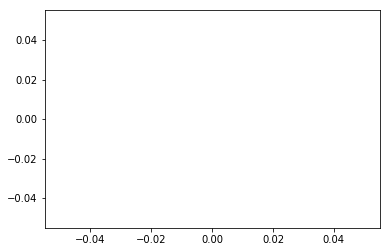

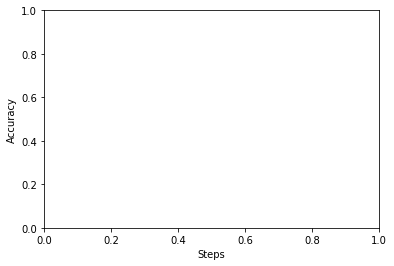

In [24]:
# TODO: Display graph of performance over time
plt.plot(performance_graph)
plt.figure().set_facecolor('white')
plt.xlabel("Steps")
plt.ylabel("Accuracy")

In [25]:
# TODO: Run through the evaluation data set, check accuracy of model

In [ ]:
# TODO: Get a random set of images and make guesses for each